<a href="https://colab.research.google.com/github/codefinite-vri/Underwater-Acoustic-Image-Processing-Codes/blob/main/Deep%20Data%20Denoising%20Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import *

In [ ]:
data_dir = '/content/drive/My Drive/Marine_Debris_Detection_Dataset_Main/fls-images'
data_dir = Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

AttributeError: ignored

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import tensorflow as tf

In [ ]:
pip install split-folders

ERROR: Operation cancelled by user


In [ ]:
data_dir='/content/drive/My Drive/Marine_Debris_Detection_Dataset_Main/class-image-crops'

In [ ]:
output = '/content/drive/My Drive'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1896 images belonging to 10 classes.
Found 468 images belonging to 10 classes.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2364 files belonging to 10 classes.
Using 1892 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2364 files belonging to 10 classes.
Using 472 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bottle', 'can', 'chain', 'drink-carton', 'hook', 'propeller', 'shampoo-bottle', 'standing-bottle', 'tire', 'valve']


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

In [ ]:
if K.image_data_format() == 'channels_first':
    input_train = train_ds.reshape(train_ds.shape[0], 1, img_width, img_height)
    input_test = val_ds.reshape(val_ds.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
  input_train = train_ds.reshape(train_ds.shape[0], img_width, img_height, 1)
  input_test = val_ds.reshape(val_ds.shape[0], img_width, img_height, 1)
  input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

IndentationError: ignored

TypeError: ignored

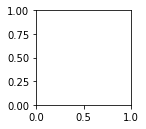

In [ ]:
input_train_shape = train_ds.shape
input_test_shape = val_ds.shape 


AttributeError: ignored

IMAGE DENOISING DATA ENCODER

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Marine_Debris_Detection_Dataset_Main/fls-images'

In [ ]:
images = glob.glob('/content/drive/My Drive/Marine_Debris_Detection_Dataset_Main/fls-images/*.png')

In [ ]:
len(images)

1868

In [ ]:
all_images = []

for i in tqdm(images):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)

100%|██████████| 1868/1868 [12:14<00:00,  2.54it/s]


In [ ]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [ ]:
Input_img = Input(shape=(80, 80, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
Input_img = Input(shape=(80, 80, 3))  
    

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(Input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
#from keras.models import Sequential
#from keras.layers import Conv2D, Conv2DTranspose
#from keras.constraints import max_norm
#verbosity = 1
#max_norm_value = 2.0

In [ ]:
#input_shape = (28,28,1)

In [ ]:
#model = Sequential()
#model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
#model.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv2DTranspose(64, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv2D(1, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

In [ ]:
#model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#model.fit(noisy_input, pure,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

In [ ]:
#model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 22, 22, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 32)        18464     
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 80, 80, 64)        1792      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 80, 80, 64)        36928     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 80, 80, 1)         577       
Total params: 39,297
Trainable params: 39,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Add noise
noise_factor = 0.55
pure = train_x
pure_test = val_x
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)
noisy_input = pure + noise_factor * noise
noisy_input_test = pure_test + noise_factor * noise_test

In [ ]:
 #validation_split = 0.2

In [ ]:
#model.fit(noisy_input, pure,
            epochs=50,
            batch_size=150,
            validation_split=validation_split)

IndentationError: ignored

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(noisy_input, pure,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(noisy_input_test, pure_test),
            callbacks=[early_stopper])

Epoch 1/50
7/7 [==============================] - 4s 639ms/step - loss: 0.0746 - val_loss: 0.0534
Epoch 2/50
7/7 [==============================] - 4s 605ms/step - loss: 0.0397 - val_loss: 0.0314
Epoch 3/50
7/7 [==============================] - 4s 605ms/step - loss: 0.0281 - val_loss: 0.0216
Epoch 4/50
7/7 [==============================] - 4s 602ms/step - loss: 0.0165 - val_loss: 0.0099
Epoch 5/50
7/7 [==============================] - 4s 605ms/step - loss: 0.0109 - val_loss: 0.0095
Epoch 6/50
7/7 [==============================] - 4s 607ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 7/50
7/7 [==============================] - 4s 606ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 8/50
7/7 [==============================] - 4s 606ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/50
7/7 [==============================] - 4s 608ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 10/50
7/7 [==============================] - 4s 607ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 11/50
7/7 [==

In [ ]:
number_of_visualizations = 6
samples = noisy_input_test[:number_of_visualizations]
targets = val_x[:number_of_visualizations]
denoised_images = autoencoder.predict(samples)

In [ ]:
predictions = autoencoder.predict(val_x)

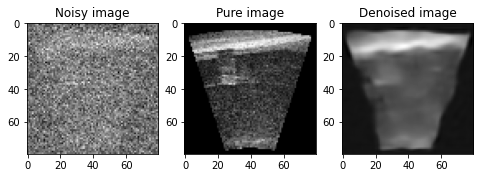

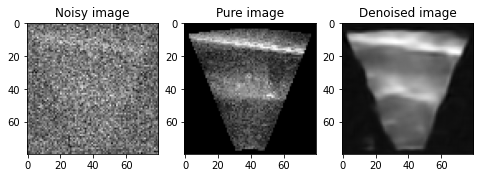

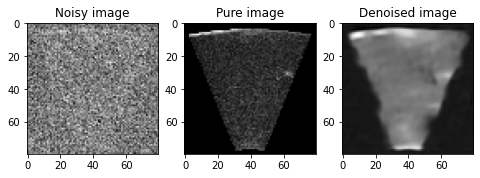

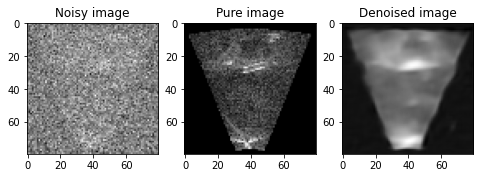

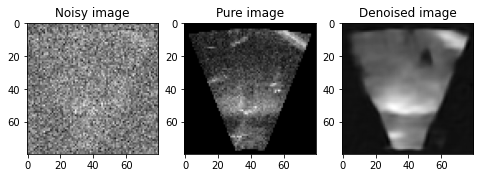

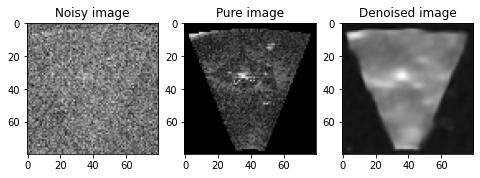

In [ ]:
# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_input_test[i][:, :, 0]
  pure_image  = pure_test[i][:, :, 0]
  denoised_image = denoised_images[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image, cmap='gray')
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image, cmap='gray')
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image, cmap='gray')
  axes[2].set_title('Denoised image')
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


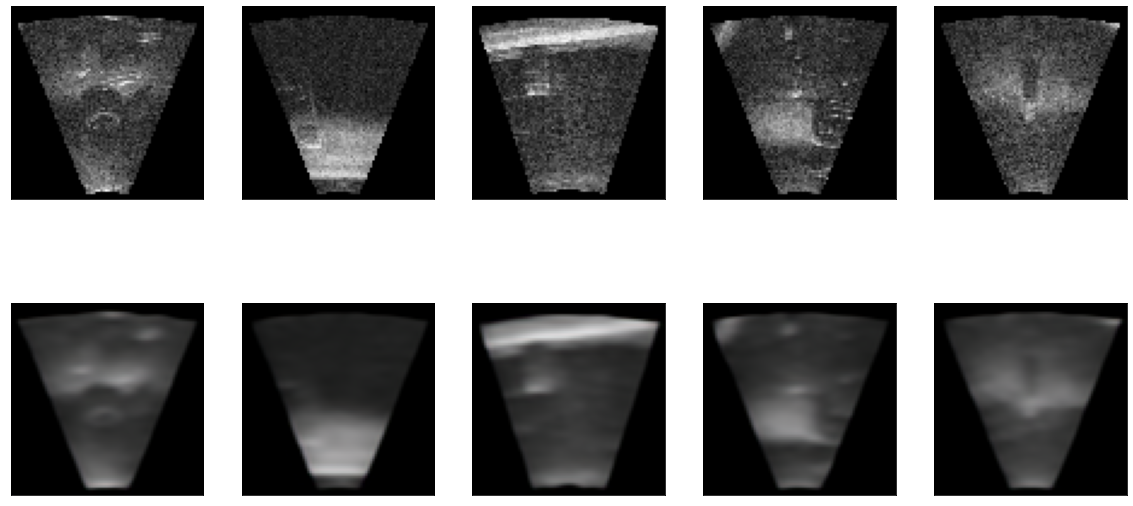

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()